In [6]:
import pandas as pd
df = pd.read_csv(r"C:\Users\kassi\Desktop\ProjectUNSW\Training and Testing Sets\UNSW_NB15_training-set.csv")

print(df.head())

   id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0   

In [7]:
df.isnull().sum()  # To see missing values
df = df.dropna()   # Drop any rows with missing data

df = df.drop(columns=["id","attack_cat","service","is_ftp_login","ct_ftp_cmd"])
print(df.head())

        dur proto state  spkts  dpkts  sbytes  dbytes       rate  sttl  dttl  \
0  0.121478   tcp   FIN      6      4     258     172  74.087490   252   254   
1  0.649902   tcp   FIN     14     38     734   42014  78.473372    62   252   
2  1.623129   tcp   FIN      8     16     364   13186  14.170161    62   252   
3  1.681642   tcp   FIN     12     12     628     770  13.677108    62   252   
4  0.449454   tcp   FIN     10      6     534     268  33.373826   254   252   

   ...  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  \
0  ...             0           1                 1                 1   
1  ...             1           1                 1                 1   
2  ...             1           2                 1                 1   
3  ...             1           2                 1                 1   
4  ...             1           2                 2                 1   

   ct_dst_src_ltm  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0     

In [8]:
df.fillna(0,inplace=True)
df.head()

df = pd.get_dummies(df, columns=["proto", "state"])

df.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,proto_zero,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,False,False,False,True,False,False,False,False,False,False
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,False,False,False,True,False,False,False,False,False,False
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,False,False,False,True,False,False,False,False,False,False
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,False,False,False,True,False,False,False,False,False,False
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,False,False,False,True,False,False,False,False,False,False


In [9]:
df = df.astype(int, errors='ignore')
df.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,proto_zero,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0,6,4,258,172,74,252,254,14158,8495,...,0,0,0,1,0,0,0,0,0,0
1,0,14,38,734,42014,78,62,252,8395,503571,...,0,0,0,1,0,0,0,0,0,0
2,1,8,16,364,13186,14,62,252,1572,60929,...,0,0,0,1,0,0,0,0,0,0
3,1,12,12,628,770,13,62,252,2740,3358,...,0,0,0,1,0,0,0,0,0,0
4,0,10,6,534,268,33,254,252,8561,3987,...,0,0,0,1,0,0,0,0,0,0


In [10]:
# Train/Test Split
from sklearn.model_selection import train_test_split

X = df.drop(['label'], axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
#Train Classifier/Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     11169
           1       0.96      0.98      0.97     23900

    accuracy                           0.96     35069
   macro avg       0.96      0.95      0.95     35069
weighted avg       0.96      0.96      0.96     35069



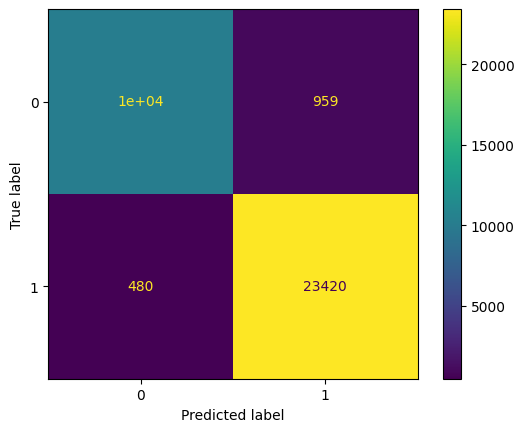

In [12]:
#Evaluate the Model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Class 0 = Normal traffic

Class 1 = Malicious (attack) traffic

This model does the following:

Correctly classifies:

10,000+ normal flows as normal (True Negatives)

23,420 attacks as attacks (True Positives)

Mistakenly classifies:

959 normal flows as attacks (False Positives)

480 attacks as normal (False Negatives)